# Decision Tree Analysis
- I really wanted to know what the parameters are that might affect stock prices, so a decision tree seems like the way to go.
- I've learned that linear regression is NOT the way to go, too.
- Still playing with time. I have files for "day-before-filing to day-of-filing price change" and "day-of-filing to day-after-filing price change", let's see if they get different results on whatever my favorite model is.
- I also have files for my data transformed by percent-change, if the originals don't seem to work well I can try those.
- Credit: https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb

In [7]:
import pandas as pd
import numpy as np

#create/read in 'day-before to day-of' dataframe with multi-index of ticker and date
df_md = pd.read_csv('minus_dayof_changes.csv', parse_dates=True, index_col=[1,2])
df_md.drop(columns='Unnamed: 0', inplace=True)
df_md.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 199 entries, ('CSCO', Timestamp('2009-11-18 00:00:00')) to ('ORCL', Timestamp('2019-06-21 00:00:00'))
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   commonstocksharesissued           199 non-null    float64
 1   assetscurrent                     199 non-null    float64
 2   accountspayablecurrent            199 non-null    float64
 3   commonstockvalue                  199 non-null    float64
 4   liabilities                       199 non-null    float64
 5   liabilitiesandstockholdersequity  199 non-null    float64
 6   stockholdersequity                199 non-null    float64
 7   earningspersharebasic             199 non-null    float64
 8   netincomeloss                     199 non-null    float64
 9   profitloss                        199 non-null    float64
 10  costofgoodssold                   199 non-null    floa

In [12]:
# create a column "change is positive or not" and drop change/pct_change in order to binary classify
df_md['price_change_positive'] = df_md['change'] > 0
df_md.head()

commonstocksharesissued  assetscurrent  \
ticker date                                                 
CSCO   2009-11-18             5.751000e+09   4.469700e+10   
       2010-02-17             5.785000e+09   4.417700e+10   
       2010-05-26             5.722000e+09   4.975800e+10   
       2010-09-21             5.655000e+09   5.142100e+10   
       2010-11-23             5.577000e+09   5.040600e+10   

                   accountspayablecurrent  commonstockvalue   liabilities  \
ticker date                                                                 
CSCO   2009-11-18             729000000.0               0.0  2.865400e+10   
       2010-02-17             675000000.0               0.0  2.945100e+10   
       2010-05-26             902000000.0               0.0  3.544000e+10   
       2010-09-21             895000000.0               0.0  3.684500e+10   
       2010-11-23             945000000.0               0.0  3.532000e+10   

                   liabilitiesandstockholdersequity  stockholdersequity  \
ticker date                                                               
CSCO   2009-11-18                      6.868000e+10        4.000200e+10   
       2010-02-17                      6.812800e+10        3.864700e+10   
       2010-05-26                      7.929200e+10        4.383000e+10   
       2010-09-21                      8.113000e+10        4.426700e+10   
       2010-11-23                      8.001500e+10        4.467500e+10   

                   earningspersharebasic  netincomeloss    profitloss  ...  \
ticker date                                                            ...   
CSCO   2009-11-18                   0.31   1.787000e+09  1.787000e+09  ...   
       2010-02-17                   0.32   1.853000e+09  1.787000e+09  ...   
       2010-05-26                   0.38   2.192000e+09  1.787000e+09  ...   
       2010-09-21                   0.34   1.935000e+09  1.787000e+09  ...   
       2010-11-23                   0.34   1.930000e+09  1.787000e+09  ...   

                   deferredrevenue   grossprofit  sharesissued  \
ticker date                                                      
CSCO   2009-11-18     1.108300e+10  5.888000e+09  5.751000e+09   
       2010-02-17     1.108300e+10  6.332000e+09  5.785000e+09   
       2010-05-26     1.108300e+10  6.630000e+09  5.722000e+09   
       2010-09-21     1.108300e+10  6.793000e+09  5.655000e+09   
       2010-11-23     1.073600e+10  3.788000e+09  5.577000e+09   

                   commercialpaper  costofservices   debtcurrent  \
ticker date                                                        
CSCO   2009-11-18      513000000.0    6.470000e+08  3.127000e+09   
       2010-02-17      513000000.0    6.680000e+08  3.127000e+09   
       2010-05-26      513000000.0    7.280000e+08  3.127000e+09   
       2010-09-21      513000000.0    2.777000e+09  1.524100e+10   
       2010-11-23      513000000.0    7.460000e+08  1.524100e+10   

                   salariesandwages  change  pct_change  price_change_positive  
ticker date                                                                     
CSCO   2009-11-18          245000.0 -0.0900   -0.003736                  False  
       2010-02-17          245000.0  0.0700    0.002917                   True  
       2010-05-26          245000.0 -0.4200   -0.018018                  False  
       2010-09-21          245000.0 -0.1099   -0.005053                  False  
       2010-11-23          245000.0 -0.3600   -0.018405                  False  

[5 rows x 28 columns]

In [13]:
df_md.drop(['change', 'pct_change'], axis=1, inplace=True)

In [14]:
df_md_unseen = df_md.query('date >= 2019')
df_md_unseen.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ('CSCO', Timestamp('2019-02-19 00:00:00')) to ('ORCL', Timestamp('2019-06-21 00:00:00'))
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   commonstocksharesissued           12 non-null     float64
 1   assetscurrent                     12 non-null     float64
 2   accountspayablecurrent            12 non-null     float64
 3   commonstockvalue                  12 non-null     float64
 4   liabilities                       12 non-null     float64
 5   liabilitiesandstockholdersequity  12 non-null     float64
 6   stockholdersequity                12 non-null     float64
 7   earningspersharebasic             12 non-null     float64
 8   netincomeloss                     12 non-null     float64
 9   profitloss                        12 non-null     float64
 10  costofgoodssold                   12 non-null     float

In [15]:
df_md_seen = df_md.query('date < 2019')
df_md_seen.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 187 entries, ('CSCO', Timestamp('2009-11-18 00:00:00')) to ('ORCL', Timestamp('2018-12-19 00:00:00'))
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   commonstocksharesissued           187 non-null    float64
 1   assetscurrent                     187 non-null    float64
 2   accountspayablecurrent            187 non-null    float64
 3   commonstockvalue                  187 non-null    float64
 4   liabilities                       187 non-null    float64
 5   liabilitiesandstockholdersequity  187 non-null    float64
 6   stockholdersequity                187 non-null    float64
 7   earningspersharebasic             187 non-null    float64
 8   netincomeloss                     187 non-null    float64
 9   profitloss                        187 non-null    float64
 10  costofgoodssold                   187 non-null    floa

In [17]:
from pycaret.classification import *
exp_md = setup(data = df_md_seen, target = 'price_change_positive', session_id=123, numeric_features=['preferredstockvalue'])

,Description,Value
0,session_id,123
1,Target,price_change_positive
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(187, 26)"
5,Missing Values,False
6,Numeric Features,25
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4923,0.4844,0.3733,0.4709,0.3852,-0.0346,-0.0263,0.0220
lr,Logistic Regression,0.4769,0.4614,0.3867,0.4152,0.3959,-0.0656,-0.0665,1.6040
lightgbm,Light Gradient Boosting Machine,0.4769,0.4810,0.4667,0.4361,0.4331,-0.0475,-0.0615,0.2320
svm,SVM - Linear Kernel,0.4692,0.0000,0.6100,0.3118,0.4115,-0.0365,-0.0370,0.0270
ridge,Ridge Classifier,0.4692,0.0000,0.3867,0.4115,0.3944,-0.0794,-0.0807,0.0580
lda,Linear Discriminant Analysis,0.4692,0.4351,0.3867,0.4115,0.3944,-0.0794,-0.0807,0.1190
et,Extra Trees Classifier,0.4692,0.4041,0.3733,0.4140,0.3838,-0.0787,-0.0833,0.0650
catboost,CatBoost Classifier,0.4692,0.4275,0.3933,0.4511,0.3994,-0.0727,-0.0703,1.4670
ada,Ada Boost Classifier,0.4615,0.5031,0.3967,0.3982,0.3834,-0.0883,-0.0897,0.0330
gbc,Gradient Boosting Classifier,0.4615,0.4682,0.3800,0.3708,0.3708,-0.0905,-0.0997,0.0370


In [19]:
print(best_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


### Already I am suspicious. Nothing above 49% accuracy?
- How does SVM have 0 area under curve and yet the best recall score?

In [20]:
# forging ahead with the "best" model so I can look at graphs.
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4615,0.4762,0.5000,0.4286,0.4615,-0.0706,-0.0714
1,0.4615,0.4762,0.3333,0.4000,0.3636,-0.0964,-0.0976
2,0.3077,0.3333,0.3333,0.2857,0.3077,-0.3765,-0.3810
3,0.6923,0.6071,0.5000,0.7500,0.6000,0.3659,0.3858
4,0.5385,0.4881,0.3333,0.5000,0.4000,0.0488,0.0514
5,0.4615,0.5000,0.6667,0.4444,0.5333,-0.0460,-0.0514
6,0.6154,0.5119,0.1667,1.0000,0.2857,0.1772,0.3118
7,0.5385,0.5119,0.5000,0.5000,0.5000,0.0714,0.0714
8,0.3077,0.4643,0.0000,0.0000,0.0000,-0.4444,-0.5071
9,0.5385,0.4750,0.4000,0.4000,0.4000,0.0250,0.0250


I have a test with 100% precision... and another with 0 precision, recall, AND F1.

In [21]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [22]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5385,0.5714,0.3333,0.5000,0.4000,0.0488,0.0514
1,0.4615,0.3571,0.0000,0.0000,0.0000,-0.1519,-0.2673
2,0.6154,0.5119,0.1667,1.0000,0.2857,0.1772,0.3118
3,0.6923,0.6786,0.5000,0.7500,0.6000,0.3659,0.3858
4,0.6154,0.5119,0.1667,1.0000,0.2857,0.1772,0.3118
5,0.3846,0.3810,0.1667,0.2500,0.2000,-0.2683,-0.2829
6,0.6154,0.6667,0.3333,0.6667,0.4444,0.1975,0.2254
7,0.5385,0.5000,0.3333,0.5000,0.4000,0.0488,0.0514
8,0.5385,0.4048,0.1667,0.5000,0.2500,0.0250,0.0329
9,0.7692,0.7125,0.4000,1.0000,0.5714,0.4507,0.5394


In [23]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')


AUC and accuracy are somewhat better but precision/recall/F1 are still pretty wild. Let's see some plots!

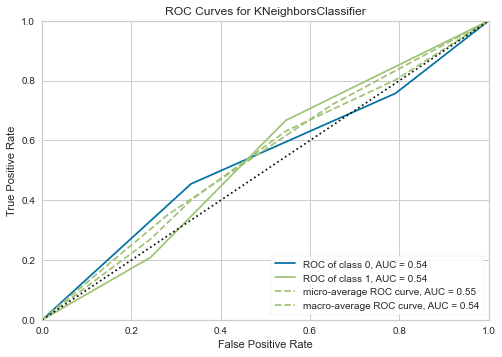

In [24]:
plot_model(tuned_knn, plot = 'auc')

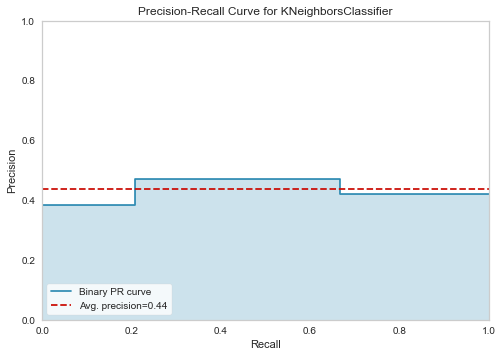

In [25]:
plot_model(tuned_knn, plot = 'pr')

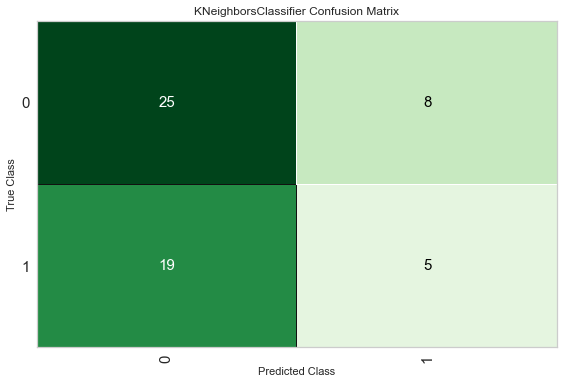

In [27]:
plot_model(tuned_knn, plot = 'confusion_matrix')

### No, this doesn't look like a great model. 
- How good does it need to be?
- Just for kicks, try the process with the dayof-dayplus data...

In [28]:
#create/read in 'day-of to day-after' dataframe with multi-index of ticker and date
df_dp = pd.read_csv('dayof_plus_changes.csv', parse_dates=True, index_col=[1,2])
df_dp.drop(columns='Unnamed: 0', inplace=True)
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 199 entries, ('CSCO', Timestamp('2009-11-18 00:00:00')) to ('ORCL', Timestamp('2019-06-21 00:00:00'))
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   commonstocksharesissued           199 non-null    float64
 1   assetscurrent                     199 non-null    float64
 2   accountspayablecurrent            199 non-null    float64
 3   commonstockvalue                  199 non-null    float64
 4   liabilities                       199 non-null    float64
 5   liabilitiesandstockholdersequity  199 non-null    float64
 6   stockholdersequity                199 non-null    float64
 7   earningspersharebasic             199 non-null    float64
 8   netincomeloss                     199 non-null    float64
 9   profitloss                        199 non-null    float64
 10  costofgoodssold                   199 non-null    floa

In [29]:
# create a column "change is positive or not" and drop change/pct_change in order to binary classify
df_dp['price_change_positive'] = df_dp['change'] > 0
df_dp.head()

commonstocksharesissued  assetscurrent  \
ticker date                                                 
CSCO   2009-11-18             5.751000e+09   4.469700e+10   
       2010-02-17             5.785000e+09   4.417700e+10   
       2010-05-26             5.722000e+09   4.975800e+10   
       2010-09-21             5.655000e+09   5.142100e+10   
       2010-11-23             5.577000e+09   5.040600e+10   

                   accountspayablecurrent  commonstockvalue   liabilities  \
ticker date                                                                 
CSCO   2009-11-18             729000000.0               0.0  2.865400e+10   
       2010-02-17             675000000.0               0.0  2.945100e+10   
       2010-05-26             902000000.0               0.0  3.544000e+10   
       2010-09-21             895000000.0               0.0  3.684500e+10   
       2010-11-23             945000000.0               0.0  3.532000e+10   

                   liabilitiesandstockholdersequity  stockholdersequity  \
ticker date                                                               
CSCO   2009-11-18                      6.868000e+10        4.000200e+10   
       2010-02-17                      6.812800e+10        3.864700e+10   
       2010-05-26                      7.929200e+10        4.383000e+10   
       2010-09-21                      8.113000e+10        4.426700e+10   
       2010-11-23                      8.001500e+10        4.467500e+10   

                   earningspersharebasic  netincomeloss    profitloss  ...  \
ticker date                                                            ...   
CSCO   2009-11-18                   0.31   1.787000e+09  1.787000e+09  ...   
       2010-02-17                   0.32   1.853000e+09  1.787000e+09  ...   
       2010-05-26                   0.38   2.192000e+09  1.787000e+09  ...   
       2010-09-21                   0.34   1.935000e+09  1.787000e+09  ...   
       2010-11-23                   0.34   1.930000e+09  1.787000e+09  ...   

                   deferredrevenue   grossprofit  sharesissued  \
ticker date                                                      
CSCO   2009-11-18     1.108300e+10  5.888000e+09  5.751000e+09   
       2010-02-17     1.108300e+10  6.332000e+09  5.785000e+09   
       2010-05-26     1.108300e+10  6.630000e+09  5.722000e+09   
       2010-09-21     1.108300e+10  6.793000e+09  5.655000e+09   
       2010-11-23     1.073600e+10  3.788000e+09  5.577000e+09   

                   commercialpaper  costofservices   debtcurrent  \
ticker date                                                        
CSCO   2009-11-18      513000000.0    6.470000e+08  3.127000e+09   
       2010-02-17      513000000.0    6.680000e+08  3.127000e+09   
       2010-05-26      513000000.0    7.280000e+08  3.127000e+09   
       2010-09-21      513000000.0    2.777000e+09  1.524100e+10   
       2010-11-23      513000000.0    7.460000e+08  1.524100e+10   

                   salariesandwages  change  pct_change  price_change_positive  
ticker date                                                                     
CSCO   2009-11-18          245000.0   -0.32   -0.013333                  False  
       2010-02-17          245000.0    0.21    0.008725                   True  
       2010-05-26          245000.0    0.78    0.034076                   True  
       2010-09-21          245000.0    0.03    0.001386                   True  
       2010-11-23          245000.0    0.26    0.013542                   True  

[5 rows x 28 columns]

In [30]:
df_dp.drop(['change', 'pct_change'], axis=1, inplace=True)

In [31]:
df_dp_unseen = df_dp.query('date >= 2019')
df_dp_unseen.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ('CSCO', Timestamp('2019-02-19 00:00:00')) to ('ORCL', Timestamp('2019-06-21 00:00:00'))
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   commonstocksharesissued           12 non-null     float64
 1   assetscurrent                     12 non-null     float64
 2   accountspayablecurrent            12 non-null     float64
 3   commonstockvalue                  12 non-null     float64
 4   liabilities                       12 non-null     float64
 5   liabilitiesandstockholdersequity  12 non-null     float64
 6   stockholdersequity                12 non-null     float64
 7   earningspersharebasic             12 non-null     float64
 8   netincomeloss                     12 non-null     float64
 9   profitloss                        12 non-null     float64
 10  costofgoodssold                   12 non-null     float

In [32]:
df_dp_seen = df_dp.query('date < 2019')
df_dp_seen.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 187 entries, ('CSCO', Timestamp('2009-11-18 00:00:00')) to ('ORCL', Timestamp('2018-12-19 00:00:00'))
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   commonstocksharesissued           187 non-null    float64
 1   assetscurrent                     187 non-null    float64
 2   accountspayablecurrent            187 non-null    float64
 3   commonstockvalue                  187 non-null    float64
 4   liabilities                       187 non-null    float64
 5   liabilitiesandstockholdersequity  187 non-null    float64
 6   stockholdersequity                187 non-null    float64
 7   earningspersharebasic             187 non-null    float64
 8   netincomeloss                     187 non-null    float64
 9   profitloss                        187 non-null    float64
 10  costofgoodssold                   187 non-null    floa

In [33]:
exp_dp = setup(data = df_dp_seen, target = 'price_change_positive', session_id=123, numeric_features=['preferredstockvalue'])

,Description,Value
0,session_id,123
1,Target,price_change_positive
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(187, 26)"
5,Missing Values,False
6,Numeric Features,25
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5308,0.4734,0.2767,0.4783,0.3169,0.0076,0.0191,0.0120
lr,Logistic Regression,0.5231,0.4523,0.3667,0.4623,0.3763,0.0125,0.0279,0.7010
svm,SVM - Linear Kernel,0.5231,0.0000,0.2167,0.2313,0.1934,-0.0198,-0.0241,0.0090
rf,Random Forest Classifier,0.5154,0.4977,0.3933,0.4236,0.3941,0.0008,0.0000,0.0740
ridge,Ridge Classifier,0.5077,0.0000,0.3667,0.4492,0.3768,-0.0089,0.0003,0.0090
lda,Linear Discriminant Analysis,0.5077,0.4281,0.3667,0.4492,0.3768,-0.0089,0.0003,0.0070
qda,Quadratic Discriminant Analysis,0.5000,0.4359,0.4667,0.4385,0.4378,-0.0062,-0.0055,0.0090
ada,Ada Boost Classifier,0.4923,0.4608,0.4767,0.4329,0.4386,-0.0206,-0.0174,0.0280
catboost,CatBoost Classifier,0.4923,0.4698,0.3567,0.4214,0.3691,-0.0350,-0.0396,1.0310
nb,Naive Bayes,0.4769,0.4438,0.5367,0.4321,0.4653,-0.0229,-0.0192,0.0070


A little better? A few accuracy over 50%, less wild on the precision/recall.

In [35]:
print(best_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [36]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4615,0.7262,0.0000,0.0000,0.0000,-0.1519,-0.2673
1,0.4615,0.4524,0.3333,0.4000,0.3636,-0.0964,-0.0976
2,0.3846,0.4167,0.1667,0.2500,0.2000,-0.2683,-0.2829
3,0.4615,0.3810,0.3333,0.4000,0.3636,-0.0964,-0.0976
4,0.4615,0.2500,0.1667,0.3333,0.2222,-0.1235,-0.1409
5,0.6154,0.5952,0.1667,1.0000,0.2857,0.1772,0.3118
6,0.3846,0.1875,0.2000,0.2000,0.2000,-0.3000,-0.3000
7,0.5385,0.4250,0.4000,0.4000,0.4000,0.0250,0.0250
8,0.6923,0.4375,0.2000,1.0000,0.3333,0.2353,0.3651
9,0.8462,0.8625,0.8000,0.8000,0.8000,0.6750,0.6750


There's that wildness in precision/recall again...

In [37]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [38]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5385,0.4405,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5385,0.5357,0.1667,0.5000,0.2500,0.0250,0.0329
2,0.6154,0.3571,0.1667,1.0000,0.2857,0.1772,0.3118
3,0.3846,0.3214,0.0000,0.0000,0.0000,-0.3000,-0.3948
4,0.5385,0.3690,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.5385,0.7143,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6154,0.3500,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.5385,0.4000,0.2000,0.3333,0.2500,-0.0541,-0.0577
8,0.6154,0.5750,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.6154,0.6375,0.0000,0.0000,0.0000,0.0000,0.0000


Now it's even wierder. How do you even get a test like row 5?

In [39]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=34, p=2,
                     weights='uniform')


Why did it pick 2 neighbors in the "day-before" trial and 34 neighbors this time?

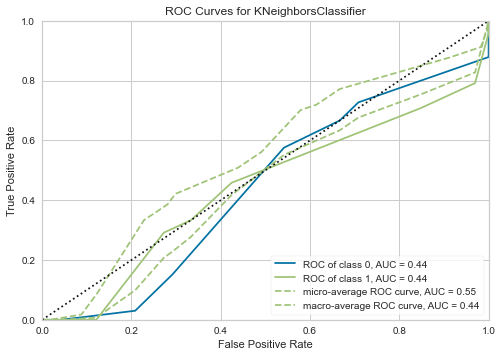

In [40]:
plot_model(tuned_knn, plot = 'auc')

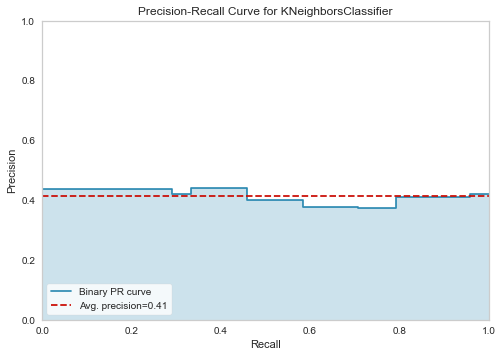

In [41]:
plot_model(tuned_knn, plot = 'pr')

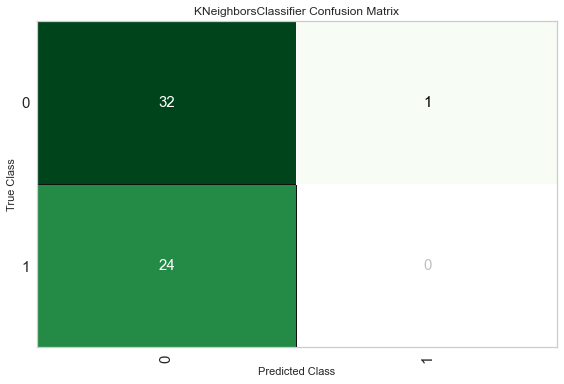

In [42]:
plot_model(tuned_knn, plot = 'confusion_matrix')

Good grief, it predicted "everything false". Argh!